### News about PyPerf Jupyter Kernel (Performance Monitoring and Analysis in Jupyter)
- added metrics to display in Jupyter (mean/max/min, raw values) for: CPU,GPU,Mem
- use dropdown menus to select metrics (interactively)
- use in-memory serialization instead of disk-based for Score-P execution
- modular system for backbone serializer (dill/cloudpickle)

---

**Toy Example:** Estimating Pi by Throwing Darts

In [1]:
%env PYPERF_REPORT_FREQUENCY=2

env: PYPERF_REPORT_FREQUENCY=2


In [2]:
%env PYPERF_REPORTS_MIN=2

env: PYPERF_REPORTS_MIN=2


In [3]:
from random import random
from time import time
from multiprocessing import Pool
import sys

In [4]:
def throw_dart(iterations: int) -> int:
    hits = 0
    for i in range(iterations):
        x = random()
        y = random()
        if (x * x) + (y * y) <= 1:
            hits = hits + 1
    return hits


def compute_pi(iterations, process_count):
    pool = Pool(processes=process_count)
    trials_per_process = [int(iterations / process_count)] * process_count

    start = time()

    hits = pool.map(throw_dart, trials_per_process)
    pi = (sum(hits) * 4) / iterations

    end = time()

    print(pi)
    print(f"Execution time: {end - start} seconds.")

In [5]:
# 10⁹ iterations on 4 CPUs.on_click(partial(generate_plot, x=x, y=y))
compute_pi(10**9, 8)

3.14160372
Execution time: 63.55716419219971 seconds.

----Performance Data----
Duration: 63.67

CPU Util    	AVG: 97.75	 MIN: 0.00	 MAX: 100.00
Mem Util    	AVG: 36.30	 MIN: 36.20	 MAX: 36.40
IO Ops(R)   	AVG: 344.94	 MIN: 188.00	 MAX: 500.00
      (W)   	AVG: 31.00	 MIN: 0.00	 MAX: 62.00
IO Bytes(R) 	AVG: 0.00	 MIN: 0.00	 MAX: 0.00
        (W) 	AVG: 0.00	 MIN: 0.00	 MAX: 0.00


In [14]:
%%serializer_settings
MODE=memory
SERIALIZER=cloudpickle

Kernel uses 'cloudpickle' serializer in 'memory' mode.

Button(description='Add Display', style=ButtonStyle())

Output()

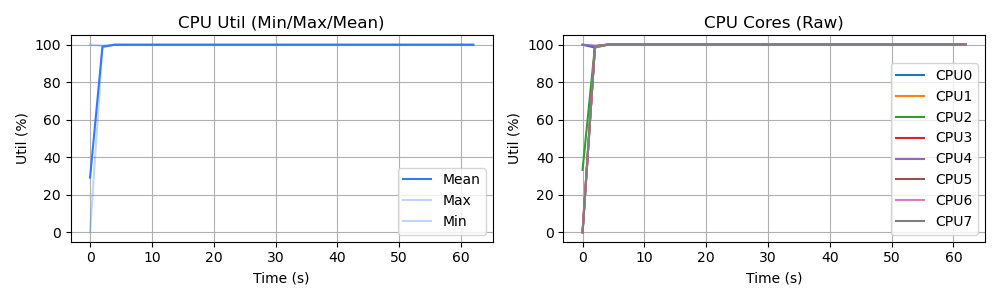

In [6]:
%%display_graph_for_last

Button(description='Add Display', style=ButtonStyle())

Output()

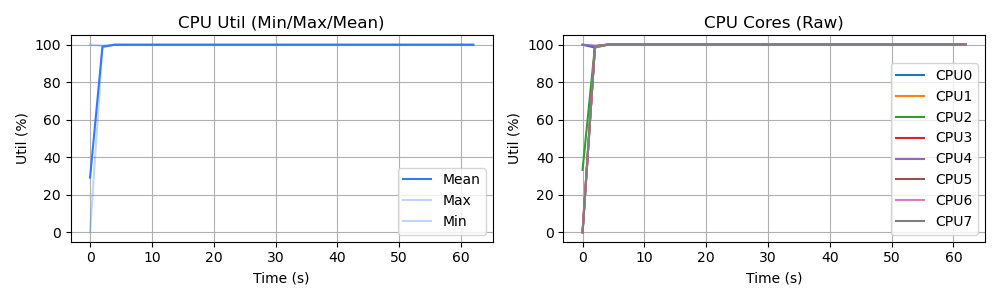

In [7]:
%%display_graph_for_index 0

Button(description='Add Display', style=ButtonStyle())

Output()

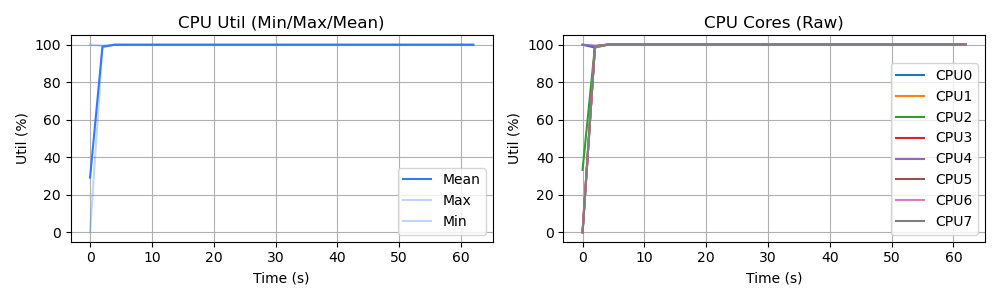

In [8]:
%%display_graph_for_all

In [9]:
%%display_code_history

In [10]:
%%display_code_for_index 0

Cell timestamp: 2024-05-11 00:31:34.607913
--
# 10⁹ iterations on 4 CPUs.on_click(partial(generate_plot, x=x, y=y))
compute_pi(10**9, 8)

In [11]:
%%perfdata_to_variable myvar

Exported performance data to myvar variable

In [12]:
%%perfdata_to_json myfile

Exported performance data to myfile_perfdata.json and myfile_code.json

---
**Plans:**
- retrieve metrics on multiple nodes (add network, psutil delivers that)
- parallel serialization (for scorep)
- show index as thumbnail or so when hovering the graphs
- Download performance data Json
- export to a python variable in the kernel